In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---

The exam has 20 questions.
* Q1 is a conceptual question with 3 parts, each worth 3 points.
* Q2-Q19 is about a dataset of drug overdoses.
    * Q2 is worth 3 points
    * Q3-Q15 are worth 4 points each
    * Q16-Q18 are worth 6 points each
    * Q19 is worth 8 points
* Q20 is a classification question on a dataset of chess games.
    * Part (a) is worth 7 points
    * Part (b) is worth 3 points

*Best of luck!*

---

![Figures](Figures.png)

Consider the two datasets above, where the two colors correspond to two different classes. For the following questions, provide a short reason for your answers. You may use the points named in the figures (from A to P) for your explanations. If there are multiple possible choices for your answer, you can provide any one.

### [Q1(a) 3 points]
Which dataset can I classify better using a depth-1 decision tree (which only allows one top-level split)?

Both same

### [Q1(b) 3 points]
Which dataset can I classify better using a depth-2 decision tree?

Dataset 1

### [Q1(c) 3 points]
Can any linear separator achieve better than 50% accuracy on Dataset 1? Why or why not?

Not more than 50%, no linear line can cut the dataset1 without misclassifying more than or equal to 50% of data

---

We will consider a dataset (*overdoses.csv*) where each row represents one drug-related death in Connecticut. We will use the following fields:
* Date, Age, Sex, and Race are self-explanatory
* ResidenceCity and ResidenceCounty are the city and county where the deceased person lived.
* DeathCity and DeathCounty are the city and county where the death was reported.
* COD is a text string for the Cause Of Death
* Location is the place where the person died. For example, it could be a Hospital.
* LocationifOther is an extra string giving more details about the Location.
* There are many columns for individual drugs. For example, under the column named "Heroin", we have a "Y" if the person had Heroin in their blood. If there was no Heroin in their blood, the value is missing.
    * Sometimes the value may be something other than a "Y". When this happens, we will just think of it as missing.
    * The "Other" column lists drug names instead of a "Y". We will ignore the "Other" column.
* DeathCityGeo and ResidenceCityGeo give latitude and longitude coordinates for the death and residence cities

### [Q2 3 points] Read in overdoses.csv

Print the SECOND row.

In [10]:
over = pd.read_csv("overdoses.csv" , parse_dates=['Date'])
over.iloc[1]

ID                                                 13-0102
Date                                   2013-03-21 00:00:00
DateType                                       DateofDeath
Age                                                   48.0
Sex                                                   Male
Race                                                 Black
ResidenceCity                                      NORWALK
ResidenceCounty                                        NaN
ResidenceState                                         NaN
DeathCity                                          NORWALK
DeathCounty                                      FAIRFIELD
Location                                          Hospital
LocationifOther                                        NaN
DescriptionofInjury                                    NaN
InjuryPlace                                            NaN
InjuryCity                                             NaN
InjuryCounty                                           N


In some of the following questions, we will need to access the columns corresponding to various drugs.
To make it easier, I have created a list called **drug_names** that you should use in your code. 

* You will need this in Q14, Q16, Q18, and Q19.

**Make sure you run this code cell before proceeding**

In [11]:
drug_names = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
              'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
              'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid']

### [Q3 4 points] What is the ratio of Males to Females in this dataset?

In [16]:
over.Sex.value_counts()[0]/(over.Sex.value_counts()[0] + over.Sex.value_counts()[1])

0.7400431626446929

### [Q4 4 points] How often is the DeathCity the same as the ResidenceCity?

In [17]:
len(over['Age'])

5103

In [19]:
(over['DeathCity'] == over['ResidenceCity']).sum()

3595

### [Q5 4 points] How many rows are missing either the ResidenceCity or the DeathCity or both?

In [24]:
len(over['ResidenceCity']) - len(over[['ResidenceCity','DeathCity']].dropna(how='any')['ResidenceCity'])

172

In [29]:
(over['ResidenceCity'] + over['DeathCity']).isnull().sum()

172

### [Q6 4 points] Cities per county

Print out the number of unique DeathCity in each DeathCounty.
* Sometimes either DeathCity or DeathCounty is missing. You should not count these missing rows.
* You will find one obviously-wrong value for DeathCounty. Don't worry about it.

In [30]:
over.groupby(['DeathCounty'])['DeathCity'].agg(['nunique'])

,nunique
DeathCounty,
FAIRFIELD,25
HARTFORD,36
LITCHFIELD,30
MIDDLESEX,17
NEW HAVEN,29
NEW LONDON,33
TOLLAND,19
USA,1
WINDHAM,27


In [32]:
over[['DeathCounty','DeathCity']].dropna(subset = ['DeathCity','DeathCounty']).drop_duplicates().groupby(['DeathCounty'])['DeathCity'].agg(['count'])

,count
DeathCounty,
FAIRFIELD,25
HARTFORD,36
LITCHFIELD,30
MIDDLESEX,17
NEW HAVEN,29
NEW LONDON,33
TOLLAND,19
USA,1
WINDHAM,27


### [Q7 4 points] Drugs for age groups

Split the deaths into 5 equal-sized groups based on Age.
* Each group should have (roughly) the same number of people.

Find the most common COD for each age group.

In [38]:
over['Qcut'] = pd.qcut(over['Age'],5)
over['Qcut'].value_counts()

(13.999, 30.0]    1137
(46.0, 54.0]      1086
(30.0, 38.0]      1016
(38.0, 46.0]       947
(54.0, 87.0]       915
Name: Qcut, dtype: int64

In [49]:
over.groupby(['Qcut'])['COD'].agg(lambda x : x.value_counts().index[0]).to_frame(name = 'COD Mode')

,COD Mode
Qcut,
"(13.999, 30.0]",Acute Fentanyl Intoxication
"(30.0, 38.0]",Acute Fentanyl Intoxication
"(38.0, 46.0]",Heroin Intoxication
"(46.0, 54.0]",Multiple Drug Toxicity
"(54.0, 87.0]",Multiple Drug Toxicity


In [58]:
#over.groupby(['Qcut']).agg({'Age':['mean','count'], 'DeathCity' : ['nunique',lambda x:x.value_counts().index[0]]})

### [Q8 4 points] Among deaths where the Location of death was a person's Residence, find the number of deaths in each ResidenceCity.

Plot the number of such deaths in the top-10 Residence Cities.

In [61]:
over['Location'].unique()

array([nan, 'Hospital', 'Residence', 'Other', 'Nursing Home',
       'Convalescent Home', 'Hospice'], dtype=object)

<AxesSubplot:xlabel='ResidenceCity'>

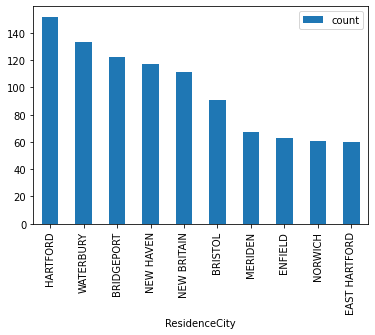

In [76]:
over[over['Location'] == 'Residence'].groupby(['ResidenceCity'])['ID'].agg(['count']).sort_values('count',ascending=False)[0:10].plot(kind='bar')

### [Q9 4 points] For each Race, find the most common Sex among those who died.

In [77]:
over.groupby('Race')['Sex'].agg(lambda x : x.value_counts().index[0]).to_frame(name = 'Sex')

,Sex
Race,
Asian Indian,Male
"Asian, Other",Male
Black,Male
Chinese,Male
Hawaiian,Male
"Hispanic, Black",Male
"Hispanic, White",Male
"Native American, Other",Male
Other,Male


### [Q10 4 points] Among the deaths where the COD is "Cocaine Intoxication", what fraction has a 'Y' under the Cocaine column?

In [81]:
over['Cocaine'].value_counts()

Y    1520
Name: Cocaine, dtype: int64

In [89]:
len(over[(over['COD'] == "Cocaine Intoxication") & (over['Cocaine'] == 'Y')])/len(over[(over['COD'] == "Cocaine Intoxication")])

1.0

### [Q11 4 points] Among deaths where Cocaine is detected but the COD does not mention 'Cocaine' or 'COCAINE', what is the most common COD?

In [95]:
over[(over['Cocaine'] == 'Y') & (over['COD'].str.lower() != 'cocaine')]['COD'].value_counts().index[0]

'Acute Cocaine Intoxication'

### [Q12 4 points] Plot number of deaths by Race.

Remove the "Unknown" Race from the plot.

<AxesSubplot:>

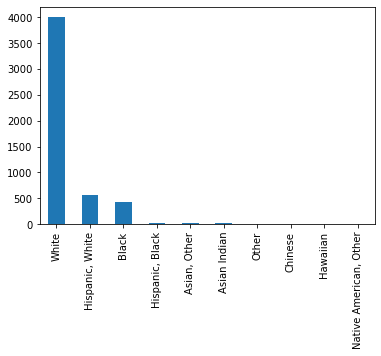

In [97]:
over[over['Race'] != 'Unknown']['Race'].value_counts().plot(kind = 'bar')


### [Q13 4 points] LocationifOther data check

The LocationifOther column is supposed to be used only if the Location column has the value "Other". Let us check this.

Count the number of rows where LocationifOther is not missing, but Location is not Other.

In [99]:
len(over[(over['Location'] != 'Other') & (over['LocationifOther'].notnull())])

30

### [Q14 4 points] What drugs never co-occur with OpiateNOS?

Two drugs co-occur if there is at least one death where both those drugs had a "Y" under their columns.
You should consider all the drugs whose names are listed in **drug_names**.

In [109]:
(over[over['OpiateNOS'] == 'Y'][drug_names] == 'Y').sum()

Heroin                 0
Cocaine                9
Fentanyl              15
FentanylAnalogue       0
Oxycodone             17
Oxymorphone            1
Ethanol               18
Hydrocodone            4
Benzodiazepine        32
Methadone              5
Amphet                 4
Tramad                 4
Morphine_NotHeroin    11
Hydromorphone          0
OpiateNOS             88
AnyOpioid             72
dtype: int64

### [Q15 4 points] Create a column called DeathCityLatLong

Extract the latitude and longitude from the DeathCityGeo column. For example,
* If DeathCityGeo is "Norwalk, CT\n(41.11805, -73.412906)", then the DeathCityLatLong column should have the value "41.11805, -73.412906"

Print out the DeathCityGeo and DeathCityLatLong columns for the first 5 rows.

In [116]:
over['DeathCityGeo']

0                  CT\n(41.575155, -72.738288)
1          Norwalk, CT\n(41.11805, -73.412906)
2         Danbury, CT\n(41.393666, -73.451539)
3       Greenwich, CT\n(41.026526, -73.628549)
4       Greenwich, CT\n(41.026526, -73.628549)
                         ...                  
5098     CHESHIRE, CT\n(41.498834, -72.901448)
5099    New Haven, CT\n(41.308252, -72.924161)
5100      DANBURY, CT\n(41.393666, -73.451539)
5101       WINDSOR, CT\n(41.852781, -72.64379)
5102    WATERBURY, CT\n(41.554261, -73.043069)
Name: DeathCityGeo, Length: 5103, dtype: object

In [123]:
over['DeathCityLatLong'] = over['DeathCityGeo'].str.replace("\n","", regex=True).str.replace("\(","", regex=True).str.replace("\)","", regex=True)
over['DeathCityLatLong'] = over['DeathCityLatLong'].str.extract(r'CT(.*)')
over[['DeathCityGeo','DeathCityLatLong']][0:5]

,DeathCityGeo,DeathCityLatLong
0,"CT\n(41.575155, -72.738288)","41.575155, -72.738288"
1,"Norwalk, CT\n(41.11805, -73.412906)","41.11805, -73.412906"
2,"Danbury, CT\n(41.393666, -73.451539)","41.393666, -73.451539"
3,"Greenwich, CT\n(41.026526, -73.628549)","41.026526, -73.628549"
4,"Greenwich, CT\n(41.026526, -73.628549)","41.026526, -73.628549"


### [Q16 6 points] Data check

* Find all deaths where the COD has two words, and the last word is Intoxication. Call these "one-COD deaths".
    * For example, if COD is "Cocaine Intoxication", then it is a one-COD death.
    * But if COD is "Cocaine and Heroin Intoxication", it is not a one-COD death.
* For every one-COD death, figure out how many drug_names were found in the person's blood
    * So if there was a "Y" under the columns "Cocaine" and "AnyOpioid", we count that as 2 drugs.
* Find out how many "one-COD deaths" actually had two or more drug_names in the person's blood.

**Note**: You may find that "Heroin" and "AnyOpioid" are both "Y", but the COD only says "Heroin Intoxication". We will count that as two drugs in the person's blood, even though Heroin is actually an Opioid and this is not really a data error.

In [173]:
over['Len COD'] = over['COD'].str.split().map(len)
over_sub = over[over['Len COD'] == 2]

mask1 = Series(over_sub['COD'].map(lambda x : x.split()[1]) == 'Intoxication')

oneCODdeath = over_sub[mask1]

In [187]:
oneCODdeath = oneCODdeath.assign(NumDrugs=(oneCODdeath[drug_names] == 'Y').apply('sum',axis=1))

In [194]:
len(oneCODdeath) - len(oneCODdeath[oneCODdeath['NumDrugs'] == 1])

40

In [193]:
len(oneCODdeath[oneCODdeath['NumDrugs'] == 1])

210

### [ Q17 6 points] Plot the number of deaths every month.

The x-axis should be the month, and the y-axis the number of deaths (i.e., rows) for that month.

In [204]:
over.set_index('Date',inplace=True)
over.sort_index(inplace=True)

<AxesSubplot:xlabel='Date'>

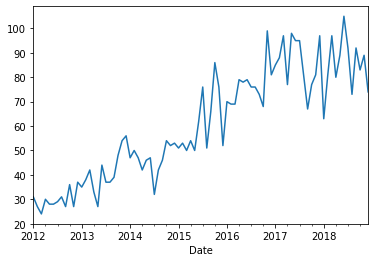

In [207]:
over.resample('M',kind='period')['ID'].count().plot()


### [Q18 6 points] Drug Cocktails
Look at deaths where COD mentions the word 'COMBINED'.
Among these deaths, count how many drugs were involved by checking how many of the drug name columns had a 'Y'
Show a bar plot where the x-axis is the number of drugs used, and the y-axis is the number of deaths caused by this drug cocktail.

In [227]:
over = over.assign(IsCombined = over['COD'].map(lambda x : 'COMBINED' in x.strip().split()))
over_sub_cocktail = over[over['IsCombined']][drug_names] 
over_sub_cocktail = over_sub_cocktail.assign(Num_Cocktail = (over_sub_cocktail == 'Y').apply('sum',axis=1))

<AxesSubplot:>

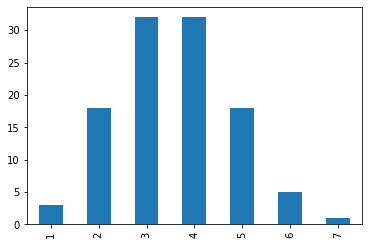

In [230]:
over_sub_cocktail['Num_Cocktail'].value_counts().sort_index().plot(kind= 'bar')

### [Q19 8 points] Differences between races

* For each DeathCity and Race, figure out how many people had a particular drug in their blood when they died. For example,
    * among Whites in City A, there may be 50 deaths with Cocaine and 12 with Heroin.
    * among Asians in City A, there may be 30 Heroin and 20 Cocaine deaths.
    * among Hispanics in City A, there may be 19 Cocaine and 18 Heroin deaths.
* Now, figure out the top drug which caused the most deaths for each DeathCity and Race. Only consider drugs that killed at least 20 people of that Race in that DeathCity; if there is no such drug, just act as if no one of that Race died in that DeathCity.
    * among Whites in City A, Cocaine is the top drug.
    * among Asians in City A, it is Heroin.
    * among Hispanics in City A, no drug led to at least 20 deaths, so there is no top drug.
* Now, print out the DeathCities for which the top drug is different for at least two Races.
    * Since the top drugs in City A are Cocaine (Whites) and Heroin (Asians), print out City A.
    * But if a City B had Cocaine (Whites) and Cocaine (Asians), don't print out City B.
    * Or if a City C had Heroin (Asians) but no other race had enough deaths to have a top drug, don't print out City C.

In [248]:
def Mortality(x):
    return(x == 'Y').sum()

over_summ = over.groupby(['DeathCity','Race'])[drug_names].agg(Mortality)
over_summ

Heroin  Cocaine  Fentanyl  FentanylAnalogue  \
DeathCity  Race                                                           
6340       White                 0        1         1                 0   
AMSTON     White                 1        0         1                 0   
ANDOVER    White                 1        0         2                 0   
ANSONIA    Black                 1        0         0                 0   
           Hispanic, White       0        0         1                 0   
...                            ...      ...       ...               ...   
WOLCOTT    Hispanic, White       0        1         1                 0   
           White                 0        0         0                 0   
WOODBRIDGE White                 3        0         1                 0   
WOODBURY   White                 2        0         0                 0   
WOODSTOCK  White                 0        1         2                 0   

                            Oxycodone  Oxymorphone  Ethanol  Hydrocodone  \
DeathCity  Race                                                            
6340       White                    0            0        1            0   
AMSTON     White                    0            0        0            0   
ANDOVER    White                    2            0        1            0   
ANSONIA    Black                    0            0        1            0   
           Hispanic, White          0            0        1            0   
...                               ...          ...      ...          ...   
WOLCOTT    Hispanic, White          0            0        0            0   
           White                    0            0        1            0   
WOODBRIDGE White                    1            0        0            0   
WOODBURY   White                    0            0        2            0   
WOODSTOCK  White                    2            0        2            0   

                            Benzodiazepine  Methadone  Amphet  Tramad  \
DeathCity  Race                                                         
6340       White                         0          0       0       0   
AMSTON     White                         0          0       0       0   
ANDOVER    White                         0          0       0       0   
ANSONIA    Black                         0          1       0       0   
           Hispanic, White               0          0       0       0   
...                                    ...        ...     ...     ...   
WOLCOTT    Hispanic, White               0          0       0       0   
           White                         0          0       0       0   
WOODBRIDGE White                         2          0       0       1   
WOODBURY   White                         1          0       0       0   
WOODSTOCK  White                         2          0       1       0   

                            Morphine_NotHeroin  Hydromorphone  OpiateNOS  \
DeathCity  Race                                                            
6340       White                             0              0          0   
AMSTON     White                             0              0          0   
ANDOVER    White                             0              0          0   
ANSONIA    Black                             0              0          0   
           Hispanic, White                   0              0          0   
...                                        ...            ...        ...   
WOLCOTT    Hispanic, White                   0              0          0   
           White                             0              0          0   
WOODBRIDGE White                             0              0          0   
WOODBURY   White                             0              0          0   
WOODSTOCK  White                             0              0          0   

                            AnyOpioid  
DeathCity  Race                        
6340       White                    0  
AMST

In [249]:
over_summ = over_summ.assign(Max_Num = over_summ[drug_names].apply('max',axis=1))

In [250]:
over_summ_filt = over_summ[over_summ['Max_Num'] >= 20]

In [253]:
over_summ_filt = over_summ_filt.assign(MostMortalityDrug = over_summ_filt[drug_names].apply('idxmax',axis=1))
over_summ_filt['MostMortalityDrug'].to_frame()

MostMortalityDrug
DeathCity     Race                             
BRIDGEPORT    Black                     Cocaine
              Hispanic, White            Heroin
              White                      Heroin
BRISTOL       White                   AnyOpioid
DANBURY       White                      Heroin
DERBY         White                   AnyOpioid
EAST HARTFORD White                    Fentanyl
ENFIELD       White                    Fentanyl
GROTON        White                      Heroin
HARTFORD      Black                     Cocaine
              Hispanic, White            Heroin
              White                      Heroin
MANCHESTER    White                   AnyOpioid
MERIDEN       White                      Heroin
MIDDLETOWN    White                    Fentanyl
MILFORD       White                      Heroin
NEW BRITAIN   Hispanic, White          Fentanyl
              White                   AnyOpioid
NEW HAVEN     Black                     Cocaine
              Hispanic, White            Heroin
              White                      Heroin
NEW LONDON    White                      Heroin
NEW MILFORD   White                      Heroin
NORWALK       White                      Heroin
NORWICH       White                      Heroin
SOUTHINGTON   White                      Heroin
STAMFORD      White              Benzodiazepine
STRATFORD     White                   AnyOpioid
TORRINGTON    White                      Heroin
VERNON        White                    Fentanyl
WATERBURY     Black                     Cocaine
              Hispanic, White          Fentanyl
              White                      Heroin
WEST HAVEN    White                   AnyOpioid

In [271]:
#over[over['DeathCity'] == 'NEW BRITAIN']['Race'].value_counts()

White              164
Hispanic, White     43
Black               13
Other                2
Unknown              2
Asian Indian         2
Name: Race, dtype: int64

In [256]:
over_summ_filt = over_summ_filt['MostMortalityDrug'].to_frame().reset_index()

In [264]:
over_summ_filt2 = over_summ_filt.groupby(['DeathCity'])['MostMortalityDrug'].agg('nunique').to_frame() 
over_summ_filt2[over_summ_filt2['MostMortalityDrug'] > 1]

,MostMortalityDrug
DeathCity,
BRIDGEPORT,2
HARTFORD,2
NEW BRITAIN,2
NEW HAVEN,2
WATERBURY,3


---

We will try to predict chess games, using the file *games.csv*.

### [Q20(a) 7 points] Train and test accuracies

* Load in the games.csv file. 
* Split it into training and testing sets, where 80% of the data is used for training. 
* Use a logistic regression classifier to predict whether white will win or not.
    * Check if the "winner" column is "white" or not.
    * You should only use "white_rating", "black_rating" and "opening_name" as features. Don't use any other columns as features.
* Print the training and test accuracies.

In [311]:
games = pd.read_csv('games.csv')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

games = games.assign(winner2 = (games['winner'] == 'white'))

games2 = games.loc[:,~games.columns.isin(['turns','opening_ply','winner'])]

games2 = pd.get_dummies(games2,drop_first=True , columns= ['opening_name'])

train, test = train_test_split(games2,train_size=0.8)


In [312]:
Y_train = train.loc[:,'winner2']
Y_test = test.loc[:,'winner2']

X_train = train.loc[:,~(train.columns.isin(['winner2']))]
X_test = test.loc[:,~(test.columns.isin(['winner2']))]



In [313]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, Y_train)



In [315]:

from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(Y_train, prediction_train))

0.6717562009223482


In [316]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(Y_test, prediction))

0.6378364905284147


### [Q20(b) 3 points] Probability of win

Print the probability of white winning a game where the game has the following features:
* white_rating is 2000
* black_rating is 1500
* All other features are exactly the same as in the first row of the games.csv file.

In [335]:
test_line = games2.iloc[0].to_frame().T


test_line['white_rating'] = 2000
test_line['black_rating'] = 1500

In [336]:
test_line

,white_rating,black_rating,winner2,opening_name_Alekhine Defense #2,opening_name_Alekhine Defense #3,opening_name_Alekhine Defense: Balogh Variation,opening_name_Alekhine Defense: Brooklyn Variation,opening_name_Alekhine Defense: Exchange Variation,opening_name_Alekhine Defense: Four Pawns Attack,opening_name_Alekhine Defense: Four Pawns Attack | 6...Nc6,...,opening_name_Zukertort Opening: Quiet System,opening_name_Zukertort Opening: Reversed Mexican Defense,opening_name_Zukertort Opening: Ross Gambit,opening_name_Zukertort Opening: Santasiere's Folly,opening_name_Zukertort Opening: Sicilian Invitation,opening_name_Zukertort Opening: Slav Invitation,opening_name_Zukertort Opening: Tennison Gambit,opening_name_Zukertort Opening: The Walrus,opening_name_Zukertort Opening: Vos Gambit,opening_name_Zukertort Opening: Wade Defense
0,2000,1500,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
model.predict_proba(test_line.loc[:,~test_line.columns.isin(['winner2'])])[0][1]

0.8078819820472379